# This is a updated version of the previos NN model

In this version we try to improve our model by normalizing the input features, 

Importing some stuff

In [1]:
import tensorflow as tf
import tensorflow.keras as ks
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
votes = pd.read_csv("../data/formatted/swissvotes_dataset_after_1900_utf8.csv", sep=';')
votes.head()

,anr,datum,titel_kurz_d,titel_kurz_f,titel_off_d,titel_off_f,stichwort,swissvoteslink,anzahl,rechtsform,...,ju_nein,ju_japroz,ju_annahme,bkresults_de,bkresults_fr,bfsmap_de,bfsmap_fr,nach_cockpit_d,nach_cockpit_f,nach_cockpit_e
0,56.0,20.05.1900,"Gesetz zur Kranken-, Unfall- und Militärversic...","Loi sur l'assurance maladie, accidents et mili...",Bundesgesetz betreffend die Kranken- und Unfal...,Loi fédérale sur l'assurance contre les maladi...,.,https://swissvotes.ch/vote/56.00,1,2,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19000520/...,https://www.bk.admin.ch/ch/f/pore/va/19000520/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.
1,57.0,04.11.1900,Initiative «für die Proporzwahl des Nationalra...,Initiative pour l'introduction du système prop...,Volksinitiative «für die Proporzwahl des Natio...,Initiative populaire tendant à l'introduction ...,Erste Proporzinitiative,https://swissvotes.ch/vote/57.00,2,3,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19001104/...,https://www.bk.admin.ch/ch/f/pore/va/19001104/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.
2,58.0,04.11.1900,Initiative für die Volkswahl des Bundesrates,Initiative pour la nomination du Conseil fédér...,Volksinitiative «für die Volkswahl des Bundesr...,Initiative populaire tendant à la nomination d...,.,https://swissvotes.ch/vote/58.00,2,3,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19001104/...,https://www.bk.admin.ch/ch/f/pore/va/19001104/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.
3,59.0,23.11.1902,Unterstützung der Primarschule durch den Bund,Subvention de l'école primaire publique par la...,Bundesbeschluss betreffend die Unterstützung d...,Arrêté fédéral concernant la subvention de l'é...,.,https://swissvotes.ch/vote/59.00,1,1,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19021123/...,https://www.bk.admin.ch/ch/f/pore/va/19021123/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.
4,60.0,15.03.1903,Zolltarifgesetz,Loi sur les tarifs douaniers,Bundesgesetz betreffend den schweizerischen Zo...,Loi fédérale sur le tarif des douanes,.,https://swissvotes.ch/vote/60.00,1,2,...,.,.,.,https://www.bk.admin.ch/ch/d/pore/va/19030315/...,https://www.bk.admin.ch/ch/f/pore/va/19030315/...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.


In [3]:
votes.describe()

,anr,anzahl,rechtsform,d1e1,legislatur,bv_pos,nr_pos,sr_pos,dauer_abst,p_mitte,...,ne_japroz,ne_annahme,ge_berecht,ge_stimmen,ge_bet,ge_gultig,ge_ja,ge_nein,ge_japroz,ge_annahme
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.00000,618.000000,618.000000,618.000000,614.000000,...,601.000000,611.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,611.000000
mean,353.484951,2.925566,2.237864,6.202265,40.851133,1.37055,1.364078,1.367314,232.624595,9787.330619,...,50.790399,0.510638,164928.925125,69508.497504,40.838785,67188.848586,35156.594010,31975.271215,53.972413,0.554828
std,172.583841,1.648424,0.949310,3.409805,7.757916,0.50306,0.494840,0.495719,132.479098,1440.381553,...,21.123289,0.500296,75547.922047,41164.327665,12.770180,39868.282306,24834.557749,25894.567073,22.766392,0.497392
min,56.000000,1.000000,1.000000,1.000000,18.000000,1.00000,1.000000,1.000000,45.000000,1.000000,...,2.850000,0.000000,23836.000000,2963.000000,10.030000,2825.000000,61.000000,127.000000,0.320000,0.000000
25%,205.250000,2.000000,1.000000,3.000000,37.000000,1.00000,1.000000,1.000000,156.000000,9999.000000,...,34.090000,0.000000,69587.000000,27289.000000,32.310000,26302.000000,14239.000000,10041.000000,37.360000,0.000000
50%,351.500000,3.000000,2.000000,6.000000,43.000000,1.00000,1.000000,1.000000,213.500000,9999.000000,...,50.490000,1.000000,192460.000000,69234.000000,41.960000,67268.000000,31235.000000,25824.000000,52.720000,1.000000
75%,501.750000,4.000000,3.000000,10.000000,46.000000,2.00000,2.000000,2.000000,269.000000,9999.000000,...,66.980000,1.000000,217280.000000,106582.000000,49.420000,102307.000000,52484.000000,48675.000000,70.240000,1.000000
max,654.000000,9.000000,5.000000,12.000000,51.000000,3.00000,3.000000,3.000000,1118.000000,9999.000000,...,95.420000,1.000000,270580.000000,148309.000000,76.660000,146939.000000,122907.000000,118139.000000,99.450000,1.000000


# Data preprocessing

### in this version we prepare different kinds of data (numerical, party recommendations and categorical)

In [4]:
list(votes.columns)
parties = ["p_fdp", "p_svp", "p_glp", "p_sps", "br_pos"]
num_features = ["legislatur"] #something characterizing the date
onehot_pre = ["dep"] #"rechtsform",
outcomes = ["volkja_proz"]
votes[outcomes].replace('.', np.nan)
votes[onehot_pre] = votes[onehot_pre][votes.dep != '.']
votes.dropna(subset = outcomes, inplace = True)
votes[onehot_pre].value_counts()

dep
3      151
5      124
6      110
2       94
7       72
4       31
1       22
8        6
dtype: int64

Data preparation vor party recommendations

In [5]:
votes['p_sps'].value_counts()

1     383
2     177
5      29
.      11
66      9
4       2
Name: p_sps, dtype: int64

Unknown party recommendations are changed into neutral. Recommendations other than yes or no are set to neutral. Yes is mapped to 1, no is mapped to -1, and neutral is 0. The data gets read as strings, so it needs to be converted.

In [6]:
df_parties = votes[parties].replace('.', 0)
df_parties.dropna(inplace=True)
for p in df_parties:
    df_parties[p] = df_parties[p].astype(int)
df_parties.head(1000)

,p_fdp,p_svp,p_glp,p_sps,br_pos
0,1,9999,9999,1,1
1,2,9999,9999,1,2
2,2,9999,9999,1,2
3,1,9999,9999,1,0
4,1,9999,9999,2,1
...,...,...,...,...,...
606,1,5,1,1,1
607,1,2,1,1,1
608,1,1,2,2,1
609,2,2,2,1,2


In [7]:
df_parties = df_parties.replace(2, -1)
df_parties = df_parties.replace([3, 4, 5, 66, 9999], 0)

print(f"before:{len(df_parties)}")
df_parties.dropna(inplace=True)
print(f"after:{len(df_parties)}")

df_parties['p_sps'].value_counts()

before:611
after:611


 1    383
-1    177
 0     51
Name: p_sps, dtype: int64

In [8]:
df_parties.shape

(611, 5)

In [9]:
votes["volkja_proz"] = votes["volkja_proz"].apply(lambda x: x/100)

Prepare Outcomes

In [10]:
threshold = 0.5;
df_outcomes_binary = (votes[outcomes] > threshold).astype(float)
df_outcomes_binary.head(1000)

,volkja_proz
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
606,1.0
607,0.0
608,1.0
609,0.0


Prepare Categorival values with onehot encoding

In [11]:
votes[onehot_pre].value_counts()
#no empty datapoints

dep
3      151
5      124
6      110
2       94
7       72
4       31
1       22
8        6
dtype: int64

In [12]:
#convert to int and make tf.onehot tensor
#then reduce dimension and convert to np_array

for o in onehot_pre:
    votes[o] = votes[o].astype(float)

onehot_tensor = tf.one_hot(votes[onehot_pre],8).numpy()
print(onehot_tensor)
onehot_np = np.squeeze(onehot_tensor)
print(onehot_np.ndim)
print(onehot_np)
onehot_np.shape


[[[0. 0. 0. ... 0. 1. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 1. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]]
2
[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(611, 8)

In [13]:
#convert onehot to pd dataframe with same index as parties
df_onehot = pd.DataFrame(onehot_np, columns = ['EDA','EDI','EJPD','VBS','EFD','WBF','UVEK','BK'], index = votes[parties].index)
print(df_onehot.head(1000))

     EDA  EDI  EJPD  VBS  EFD  WBF  UVEK   BK
0    0.0  0.0   0.0  0.0  0.0  0.0   1.0  0.0
1    0.0  1.0   0.0  0.0  0.0  0.0   0.0  0.0
2    0.0  1.0   0.0  0.0  0.0  0.0   0.0  0.0
3    0.0  0.0   1.0  0.0  0.0  0.0   0.0  0.0
4    0.0  0.0   0.0  0.0  0.0  1.0   0.0  0.0
..   ...  ...   ...  ...  ...  ...   ...  ...
606  0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0
607  0.0  0.0   0.0  0.0  0.0  0.0   0.0  1.0
608  0.0  0.0   0.0  1.0  0.0  0.0   0.0  0.0
609  0.0  0.0   0.0  0.0  0.0  1.0   0.0  0.0
610  0.0  0.0   0.0  1.0  0.0  0.0   0.0  0.0

[611 rows x 8 columns]


In [14]:
df_numerical = votes['legislatur'].apply(lambda x: x/10)
df_numerical.head(1000)

0      1.8
1      1.8
2      1.8
3      1.9
4      1.9
      ... 
606    5.1
607    5.1
608    5.1
609    5.1
610    5.1
Name: legislatur, Length: 611, dtype: float64

Combine Features

In [15]:
df_features = pd.concat([df_onehot, df_parties,df_numerical], axis = 1)
df_features.head(1000)

,EDA,EDI,EJPD,VBS,EFD,WBF,UVEK,BK,p_fdp,p_svp,p_glp,p_sps,br_pos,legislatur
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,1,1.8
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,0,0,1,-1,1.8
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,0,0,1,-1,1.8
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1.9
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,-1,1,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,1,5.1
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,-1,1,1,1,5.1
608,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,-1,-1,1,5.1
609,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-1,-1,1,-1,5.1


Create test and train split

In [16]:
from sklearn.model_selection import train_test_split
in_train, in_test, out_train, out_test = train_test_split(df_features, df_outcomes_binary, test_size=0.2)
print(type(in_test), type(out_test))
print(in_test.head(1000))
print(out_test.head(1000))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
     EDA  EDI  EJPD  VBS  EFD  WBF  UVEK   BK  p_fdp  p_svp  p_glp  p_sps  \
271  0.0  0.0   0.0  1.0  0.0  0.0   0.0  0.0      1      1      0      1   
1    0.0  1.0   0.0  0.0  0.0  0.0   0.0  0.0     -1      0      0      1   
177  0.0  0.0   0.0  0.0  0.0  0.0   1.0  0.0      0      0      0      1   
186  0.0  0.0   1.0  0.0  0.0  0.0   0.0  0.0      1      1      0      1   
404  0.0  0.0   1.0  0.0  0.0  0.0   0.0  0.0     -1     -1      0      1   
..   ...  ...   ...  ...  ...  ...   ...  ...    ...    ...    ...    ...   
44   0.0  0.0   0.0  0.0  0.0  0.0   1.0  0.0     -1     -1      0      1   
305  0.0  0.0   0.0  0.0  0.0  0.0   0.0  1.0      1      1      0      1   
262  0.0  0.0   0.0  0.0  0.0  0.0   1.0  0.0     -1      1      0      1   
208  0.0  0.0   0.0  0.0  0.0  0.0   1.0  0.0      0      0      0     -1   
568  0.0  0.0   0.0  0.0  0.0  0.0   0.0  1.0     -1     -1      1      1   


## NN
The neural net will have 2 hidden layers to start with. 20 and 10 nodes each. The optimizer is gradient descent, and the metrics are mean squared error.

In [17]:
#@title Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


In [18]:
#@title Define the functions that create and train a model.
def create_model(my_learning_rate, my_feature_layer, my_metrics):
  
    model = tf.keras.models.Sequential()

  # Add the feature layer (the list of features and how they are represented)
  # to the model.
    model.add(tf.keras.layers.Dense(units=my_feature_layer, 
                                  activation='sigmoid',
                                  name='Input'))
    
    model.add(tf.keras.layers.Dense(units=30,
                                  activation='sigmoid',
                                  name='Hidden1'))

    model.add(tf.keras.layers.Dense(units=12,
                                  activation='sigmoid',
                                  name='Hidden2'))
  
    model.add(tf.keras.layers.Dense(units=6, activation='sigmoid', name='Hidden3'))

  # Funnel the regression value through a sigmoid function
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  # Call the compile method to construct the layers into a model that
  # TensorFlow can execute.  Notice that we're using a different loss
  # function for classification than for regression.    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

    return model        


def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
    
  history = model.fit(x=in_train, y=out_train, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist  

print("Defined the create_model and train_model functions.")   

Defined the create_model and train_model functions.


Epoch 1/75

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

10/10 [==============================] - 0s 501us/step - loss: 0.6793 - accuracy: 0.6086
Epoch 2/75
10/10 [==============================] - 0s 500us/step - loss: 0.6170 - accuracy: 0.7336
Epoch 3/75
10/10 [==============================] - 0s 400us/step - loss: 0.5506 - accuracy: 0.8135
Epoch 4/75
10/10 [==============================] - 0s 400us/step - loss: 0.5203 - accuracy: 0.7971
Epoch 5/75
10/10 [==============================] - 0s 500us/step - loss: 0.5046 - accuracy: 0.7971
Epoch 6/

10/10 [==============================] - 0s 400us/step - loss: 0.4151 - accuracy: 0.8258
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 488)               7320      
_________________________________________________________________
Hidden1 (Dense)              (None, 30)                14670     
_________________________________________________________________
Hidden2 (Dense)              (None, 12)                372       
_________________________________________________________________
Hidden3 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 22,447
Trainable params: 22,447
Non-trainable params: 0
_________________________________________________________________


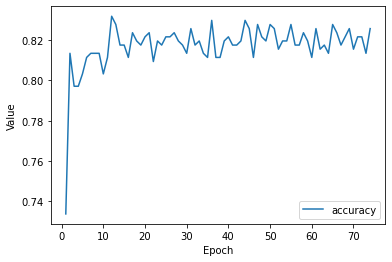

In [19]:
# The following variables are the hyperparameters.
learning_rate = 0.005
epochs = 75
batch_size = 50
label_name = "vote is passed"
classification_threshold = 0.5

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

# Establish the model's topography.
my_model = create_model(learning_rate, len(in_train), METRICS)

# Train the model on the training set.
epochs, hist= train_model(my_model, in_train, epochs, label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy'] 

my_model.summary()

plot_curve(epochs, hist, list_of_metrics_to_plot)


In [20]:
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = in_test, y = out_test['volkja_proz'])


 Evaluate the new model against the test set:
4/4 [==============================] - 0s 500us/step - loss: 0.5880 - accuracy: 0.7317


[0.5879814624786377, 0.7317073345184326]

In [21]:
out_predict = my_model.predict(in_test)
out_comparison = out_test
out_comparison["pred"] = (out_predict > 0.5).astype(float)
print(out_comparison)

     volkja_proz  pred
271          0.0   1.0
1            0.0   1.0
177          1.0   1.0
186          1.0   1.0
404          0.0   0.0
..           ...   ...
44           0.0   0.0
305          1.0   1.0
262          1.0   1.0
208          0.0   0.0
568          0.0   0.0

[123 rows x 2 columns]


C:\Users\timsa\AppData\Local\Temp/ipykernel_10496/1408098759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_comparison["pred"] = (out_predict > 0.5).astype(float)


In [22]:
num_corr = 0;
for real, pred in zip(out_comparison["volkja_proz"], out_comparison["pred"]):
    if abs(real-pred) < 0.5:
        num_corr += 1
pc_corr = (num_corr / len(out_test))* 100
print("The NN has classified ", pc_corr, "% of results correctly")

The NN has classified  73.17073170731707 % of results correctly


Using mean squared error on the predicted values

In [23]:
import math

res = 0
rmse = 0
for real, pred in zip(out_comparison["volkja_proz"], out_comparison["pred"]):
    res += abs(real-pred)
    rmse += (real-pred)**2
res /= len(out_test)
rmse = math.sqrt(rmse/len(out_test))

print(f"The NN has a mean error of\n\t{res}")
print(f"And a rmse of\n\t{rmse}")

The NN has a mean error of
	0.2682926829268293
And a rmse of
	0.5179697702828122
